<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages-import" data-toc-modified-id="Packages-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages import</a></span></li><li><span><a href="#Designing-the-demo-reconstruction-template" data-toc-modified-id="Designing-the-demo-reconstruction-template-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Designing the demo reconstruction template</a></span></li><li><span><a href="#Datasets-listing" data-toc-modified-id="Datasets-listing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datasets listing</a></span><ul class="toc-item"><li><span><a href="#Semi-LASER-spinal-cord-MRS-data-acquired-at-7T" data-toc-modified-id="Semi-LASER-spinal-cord-MRS-data-acquired-at-7T-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Semi-LASER spinal cord MRS data acquired at 7T</a></span></li></ul></li></ul></div>

# Packages import

In [1]:
# packages import
import mrs.reco as reco
import mrs.log as log

# setting logger level
# from most verbose to very quiet: DEBUG, INFO, WARN, ERROR
log.setLevel(log.INFO)

# setting up matplotlib
import matplotlib.pylab as plt
%matplotlib notebook


# Designing the demo reconstruction template
In the following cell, we are designing the reconstruction pipeline. We are deciding how to process the MRS data, which job to apply when with what parameters. This pipeline is saved and can be recalled whenever needed.

In [2]:
# create a reconstruction pipeline object
p = reco.pipeline()

# editing list of data processing jobs
# the order is important! see README.md for more info about jobs

p.job_list = [  # p.job["displaying_anatomy"],
                p.job["phasing"],
                p.job["scaling"],
                p.job["channel_combining"],
                p.job["noise_estimation"],
                p.job["zero_filling"],
                # p.job["apodizing"],
                p.job["realigning"],
                p.job["data_rejecting"],
                p.job["averaging"],
                p.job["calibrating"],
                # p.job["water_removal"],
                p.job["cropping"],
                p.job["displaying"]
                ]

# --- editing pipeline global settings ---

# reconstructed data can be saved on the disk for later use (comment if not interested)
p.settings["storage_file"] = "db_reconstructed_data.pkl"

# ppm range used to find a resonance which will be analysed for in many jobs: phasing, realigning, etc.
# usually, it has to be an intense and stable resonance (water here)
p.settings["POI_range_ppm"] = [4.5, 4.8]

# ppm range used for spectrum calibration (aiming NAA here)
p.settings["POI_shift_range_ppm"] = [1.8, 2.2]
# whatever peak found in the above range will be shifted to the below chemical shift
p.settings["POI_shift_true_ppm"] = 2.008

# ppm range used for the SNR estimation (aiming NAA here)
p.settings["POI_SNR_range_ppm"] = [1.8, 2.2]
# ppm range used for the linewidth FWHM estimation (aiming NAA here)
p.settings["POI_LW_range_ppm"] = [4.5, 4.8]

# exponential apodization damping (Hz)
# important: this apodization damping value is used *ONLY* during data analysis stages. The output final data itself will *NOT* be apodized using this damping value.
p.settings["allowed_apodization"] = 1.0

# display figures by default or not
p.settings["display"] = True

# raise an exception if raw data reconstruction goes bad or not
p.settings["raise_error_on_badreco"] = True

# --- editing some job specific settings ---

# exponential apodization damping (Hz) during individual spectra realignment
p.job["realigning"]["allowed_apodization"] = 5.0

# ppm range used to find a resonance whose SNR will be used as a criteria for data discarding data
p.job["data_rejecting"]["POI_SNR_range_ppm"] = [4.5, 4.8]

# final number of time points after data crop
p.job["cropping"]["final_npts"] = 2048

# exponential apodization damping (Hz) when displaying final spectra
p.job["displaying"]["allowed_apodization"] = 5.0

# a x0.5 factor will be applied to SNR estimations (like LCModel)
p.job["analyzing_snr"]["half_factor"] = True

# also when estimating the SNR of the reference/no WS signal
p.job["ref_data_analyzing_snr"]["half_factor"] = True

# saving this reconstruction pipeline as a template file
p.save_template("reco_pipeline_spinalcord")

# Datasets listing
## Semi-LASER spinal cord MRS data acquired at 7T
(data was anonymized)

(WARNING) pipeline._complete_missing_datasets: no [folder_additional_datasets] setting specified: will not look for additional datasets!
(INFO)  pipeline.run: reading data files...
(INFO)  pipeline.run: reading data [sLASER short TE]
(INFO)  reco.py.__new__: reading data file...
(INFO)  reco.py.__new__: ./data/spinal_cord_sLASER_longTE_WS.dat
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 48
  match = re.findall(rgx, header_string)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 34
  match = re.findall(rgx, header_string)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at position 39
  match = re.findall(rgx, header_string)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/suspect/io/twix.py:115: FutureWarning: Possible nested set at posi

phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


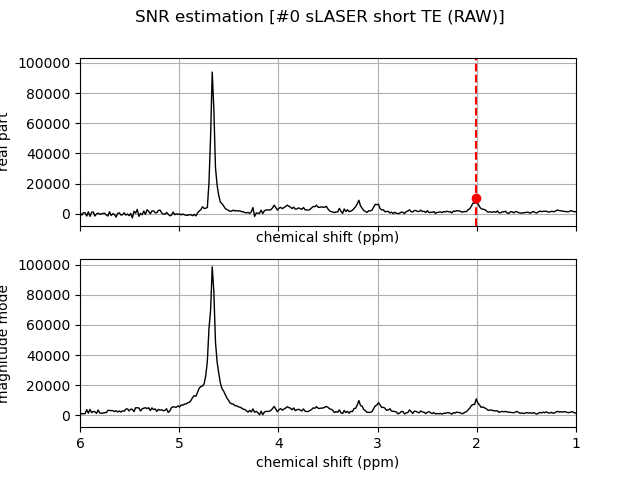

<IPython.core.display.Javascript object>


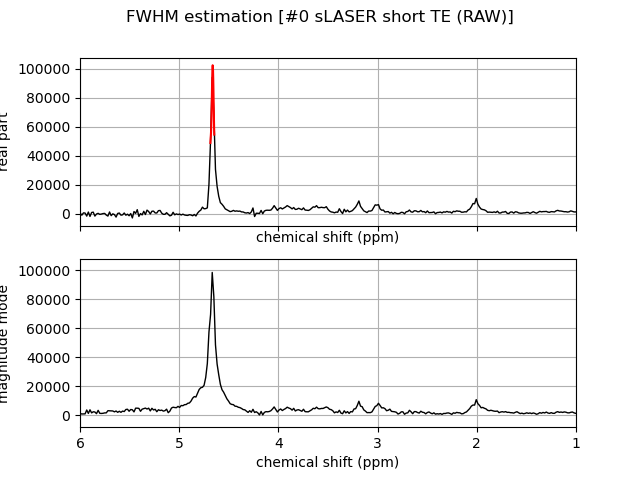

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: scaling intensity on [#0 sLASER short TE (RAW)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: channel-combining on [#0 sLASER short TE (RAW)]...
(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: estimating noise level on [#0 sLASER short TE (RAW)]...
(INFO)  MRSData2.analyze_noise_nd: noise level = 5.81E+00
(INFO)  MRSData2.analyze_noise_nd: noise level = 4.73E+01
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: zero-filling on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


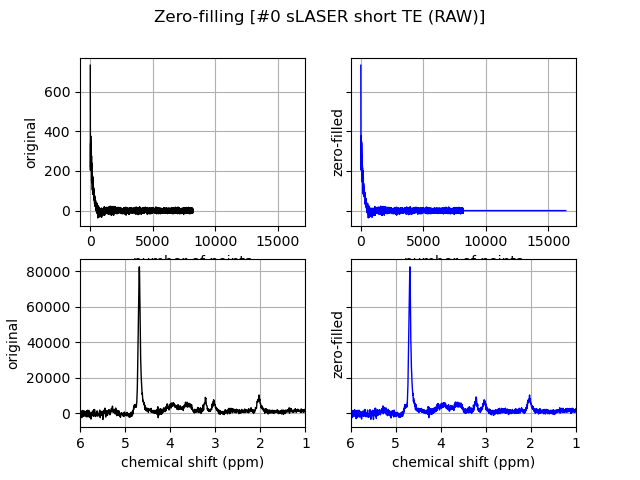

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency realigning on [#0 sLASER short TE (RAW)]...


realigning: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


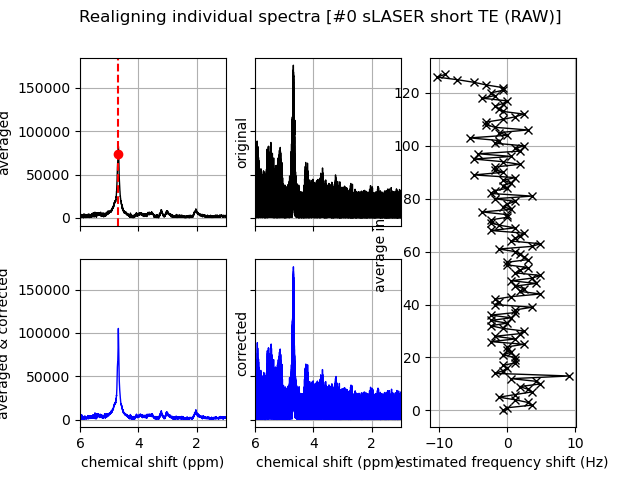

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: data rejecting on [#0 sLASER short TE (RAW)]...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection SNR = 177.10
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection linewidth = 10.99 Hz


analyzing: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: peak analysis: means ± std. deviations
(INFO)  MRSData2.correct_analyze_and_reject_2d: rel. peak amplitude = 0.00 ± 32.19 %
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. linewidth = 12.1 ± 3.0 Hz (0.041 ± 0.010 ppm)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. frequency = 4.69 ± 0.00 ppm (± 1.0 Hz)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. phase = 0.08 ± 0.42 rad


adjusting rejection threshold for [amplitude (%)] in range [0.464;100.464] (n=31): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [amplitude (%)] SNR = 178.66
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [amplitude (%)] linewidth = 10.38 Hz


<IPython.core.display.Javascript object>


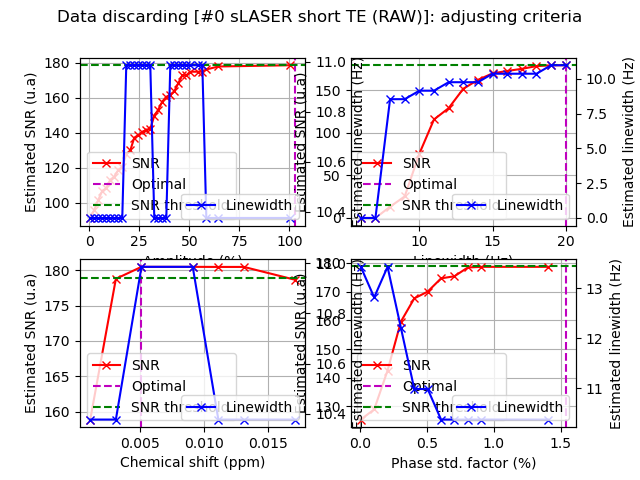

adjusting rejection threshold for [linewidth (Hz)] in range [6.000;20.000] (n=15): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: SNR change above threshold: 1.13% > 1.00% threshold! :)
(INFO)  MRSData2.correct_analyze_and_reject_2d: optimal [linewidth (Hz)] = 20.0
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [linewidth (Hz)] SNR = 179.10
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [linewidth (Hz)] linewidth = 10.99 Hz


adjusting rejection threshold for [chemical shift (ppm)] in range [0.001;0.017] (n=7): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: SNR change above threshold: 1.91% > 1.00% threshold! :)
(INFO)  MRSData2.correct_analyze_and_reject_2d: optimal [chemical shift (ppm)] = 0.0
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [chemical shift (ppm)] SNR = 180.49
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [chemical shift (ppm)] linewidth = 10.99 Hz


adjusting rejection threshold for [phase std. factor (%)] in range [0.005;1.405] (n=11): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [phase std. factor (%)] SNR = 178.66
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [phase std. factor (%)] linewidth = 10.38 Hz
(INFO)  MRSData2.correct_analyze_and_reject_2d: best adjustment done with data_rejection_method.AUTO_FREQUENCY regarding SNR! (round #1)
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection SNR = 180.49
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection linewidth = 10.99 Hz


rejecting data: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: data rejection: summary (round #1)
(INFO)  MRSData2.correct_analyze_and_reject_2d: number of averages rejected because of...
(INFO)  MRSData2.correct_analyze_and_reject_2d: amplitude = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: linewidth = 1
(INFO)  MRSData2.correct_analyze_and_reject_2d: frequency = 9
(INFO)  MRSData2.correct_analyze_and_reject_2d: phase = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: TOTAL data rejection = 9 / 128 (7%)


analyzing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


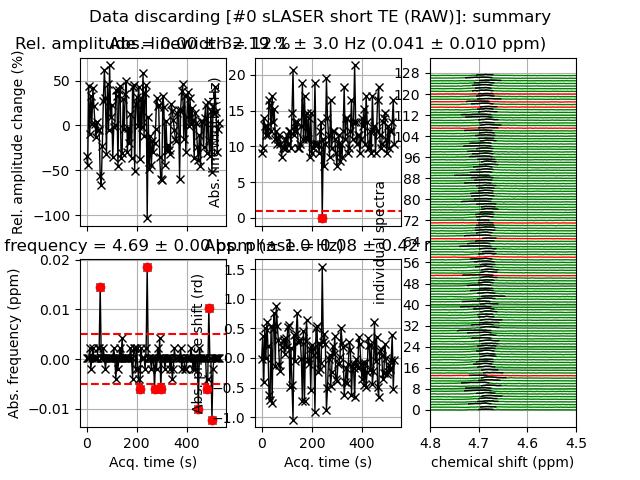

(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection SNR = 183.36
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection linewidth = 10.99 Hz
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: averaging on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


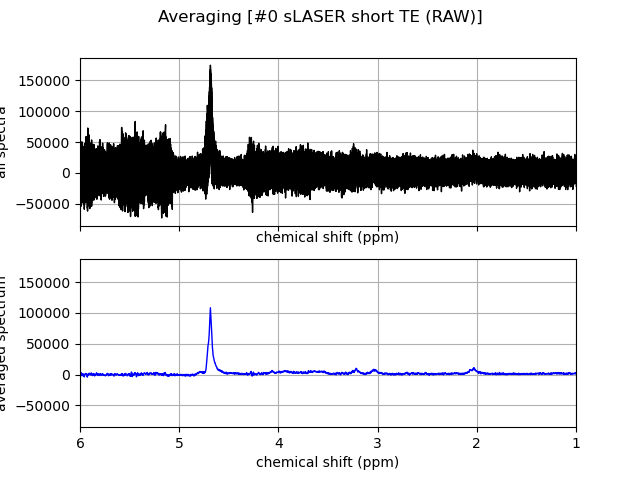

(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency shifting on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


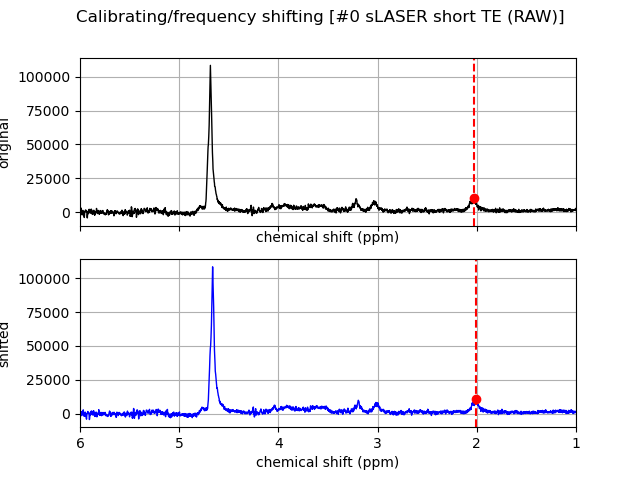

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: cropping on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


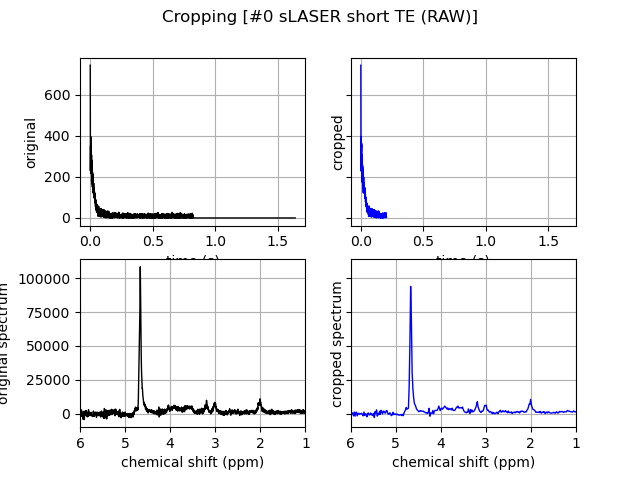

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


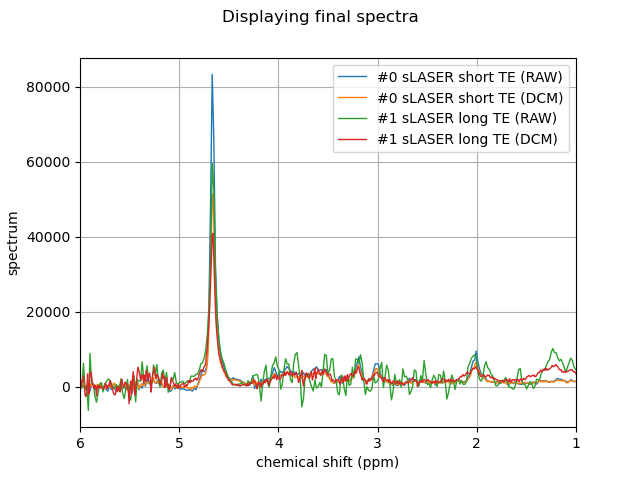

(INFO) ----------------------------------------
(INFO)  pipeline.run: processing [#0 sLASER short TE (DCM)]
(INFO) ----------------------------------------
(WARNING) pipeline.run: changing phasing setting [using_ref_data] to 0 for this dataset!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: phasing on [#0 sLASER short TE (DCM)]...


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


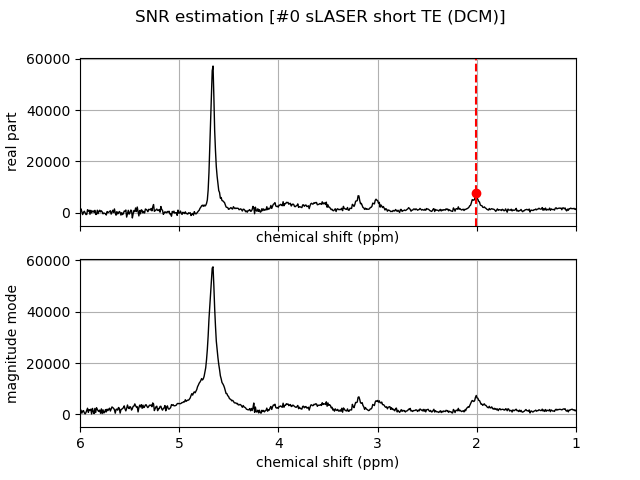

<IPython.core.display.Javascript object>


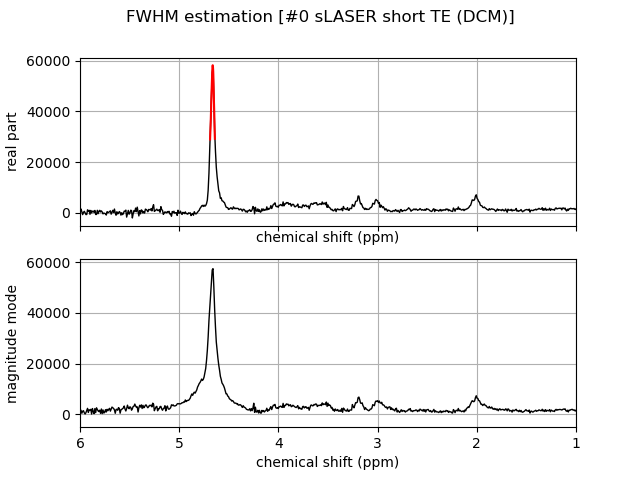

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: scaling intensity on [#0 sLASER short TE (DCM)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: channel-combining on [#0 sLASER short TE (DCM)]...
(WARNING) MRSData2.correct_combine_channels_3d: this is a single-channel signal, no need to recombine this!
(WARNING) MRSData2.correct_combine_channels_3d: reshaped to (1, 4096)
(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!
(WARNING) MRSData2.correct_combine_channels_3d: this is a single-channel signal, no need to recombine this!
(WARNING) MRSData2.correct_combine_channels_3d: reshaped to (1, 4096)
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: estimating noise level on [#0 sLASER short TE (DCM)]...
(INFO)  MRSData2.analyze_noise_nd: noise level = 7.85E+00
(INFO)  MRSData2.analyze_noise_nd: noise level = 5.69E+02
(INFO) -------

<IPython.core.display.Javascript object>


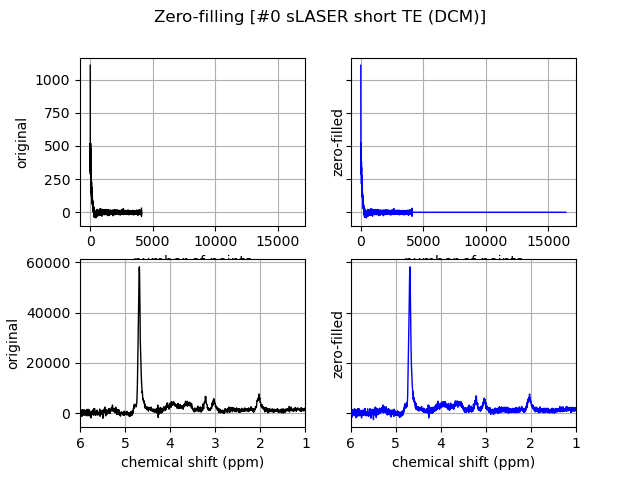

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency realigning on [#0 sLASER short TE (DCM)]...
(WARNING) MRSData2.correct_realign_2d: single-shot signal, cannot realign this!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: data rejecting on [#0 sLASER short TE (DCM)]...
(WARNING) MRSData2.correct_analyze_and_reject_2d: single-shot signal, nothing to analyze!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: averaging on [#0 sLASER short TE (DCM)]...
(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency shifting on [#0 sLASER short TE (DCM)]...


<IPython.core.display.Javascript object>


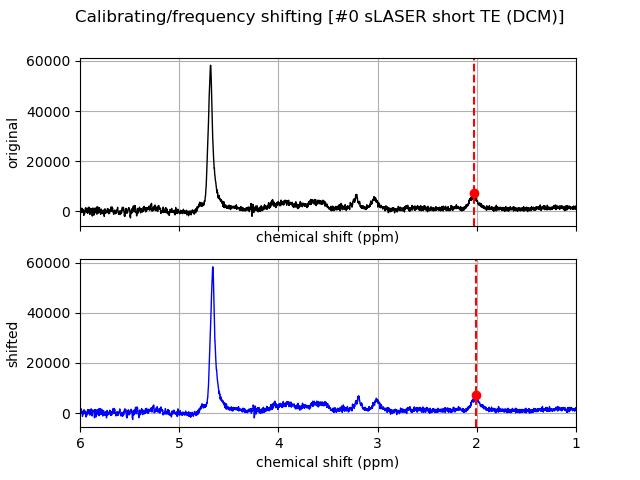

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: cropping on [#0 sLASER short TE (DCM)]...


<IPython.core.display.Javascript object>


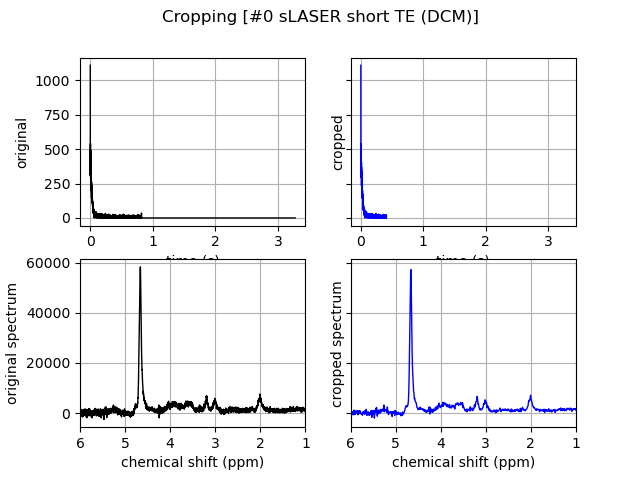

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#0 sLASER short TE (DCM)]...
(INFO) ----------------------------------------
(INFO)  pipeline.run: processing [#1 sLASER long TE (RAW)]
(INFO) ----------------------------------------
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: phasing on [#1 sLASER long TE (RAW)]...


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


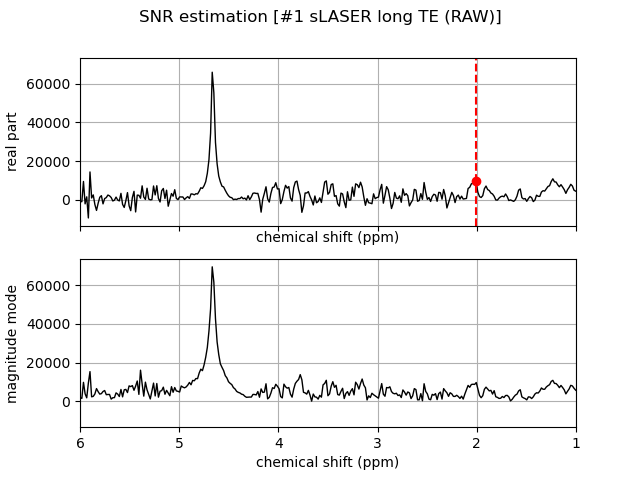

<IPython.core.display.Javascript object>


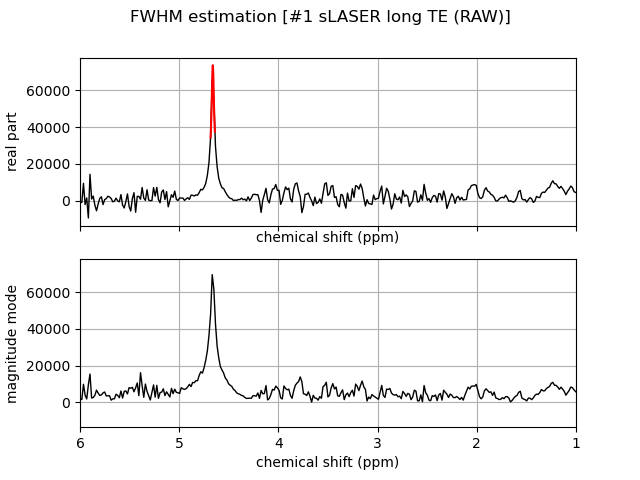

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: scaling intensity on [#1 sLASER long TE (RAW)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: channel-combining on [#1 sLASER long TE (RAW)]...
(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: estimating noise level on [#1 sLASER long TE (RAW)]...
(INFO)  MRSData2.analyze_noise_nd: noise level = 7.28E+00
(INFO)  MRSData2.analyze_noise_nd: noise level = 4.89E+01
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: zero-filling on [#1 sLASER long TE (RAW)]...


<IPython.core.display.Javascript object>


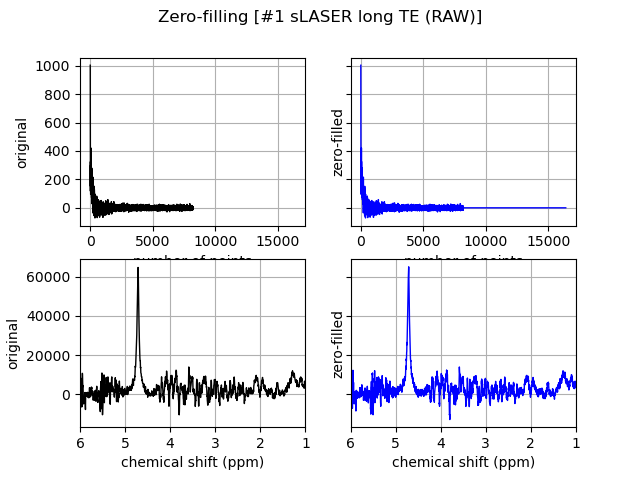

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency realigning on [#1 sLASER long TE (RAW)]...


realigning: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


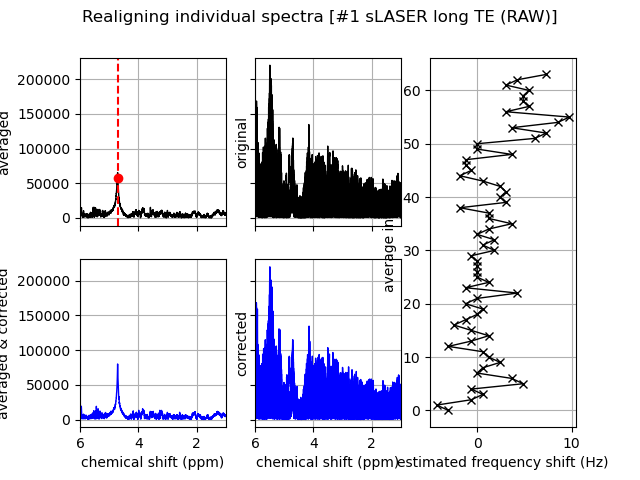

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: data rejecting on [#1 sLASER long TE (RAW)]...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Pre-data-rejection linewidth = 10.99 Hz


analyzing: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: peak analysis: means ± std. deviations
(INFO)  MRSData2.correct_analyze_and_reject_2d: rel. peak amplitude = -0.00 ± 18.67 %
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. linewidth = 12.0 ± 2.1 Hz (0.040 ± 0.007 ppm)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. frequency = 4.71 ± 0.01 ppm (± 3.4 Hz)
(INFO)  MRSData2.correct_analyze_and_reject_2d: abs. phase = 0.00 ± 0.18 rad


adjusting rejection threshold for [amplitude (%)] in range [0.826;44.826] (n=18): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [amplitude (%)] SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [amplitude (%)] linewidth = 10.99 Hz


<IPython.core.display.Javascript object>


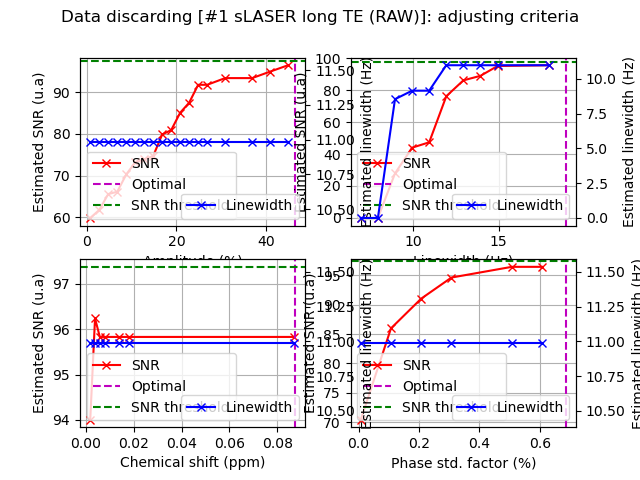

adjusting rejection threshold for [linewidth (Hz)] in range [6.935;17.935] (n=10): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [linewidth (Hz)] SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [linewidth (Hz)] linewidth = 10.99 Hz


adjusting rejection threshold for [chemical shift (ppm)] in range [0.002;0.087] (n=7): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [chemical shift (ppm)] SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [chemical shift (ppm)] linewidth = 10.99 Hz


adjusting rejection threshold for [phase std. factor (%)] in range [0.007;0.607] (n=6): ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: sorry, this is only making your SNR and LW worse...
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [phase std. factor (%)] SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Post-data-rejection based on [phase std. factor (%)] linewidth = 10.99 Hz
(INFO)  MRSData2.correct_analyze_and_reject_2d: automatic data rejection failed, no optimal method found, sorry! :(


rejecting data: ██████████████████████████████ done.


(INFO)  MRSData2.correct_analyze_and_reject_2d: data rejection: summary (round #1)
(INFO)  MRSData2.correct_analyze_and_reject_2d: number of averages rejected because of...
(INFO)  MRSData2.correct_analyze_and_reject_2d: amplitude = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: linewidth = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: frequency = 0
(INFO)  MRSData2.correct_analyze_and_reject_2d: phase = 0
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
(INFO)  MRSData2.correct_analyze_and_reject_2d: TOTAL data rejection = 0 / 64 (0%)


analyzing: ██████████████████████████████ done.


/home/tangir/data/work/recherche/crmbm/python/pastis/mrs/reco.py:2164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(fig_title)


<IPython.core.display.Javascript object>


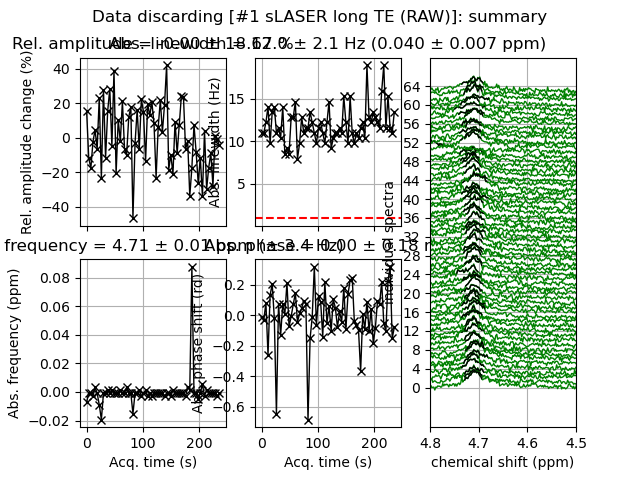

(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection SNR = 96.41
(INFO)  MRSData2.correct_analyze_and_reject_2d: * Final post-data-rejection linewidth = 10.99 Hz
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: averaging on [#1 sLASER long TE (RAW)]...


<IPython.core.display.Javascript object>


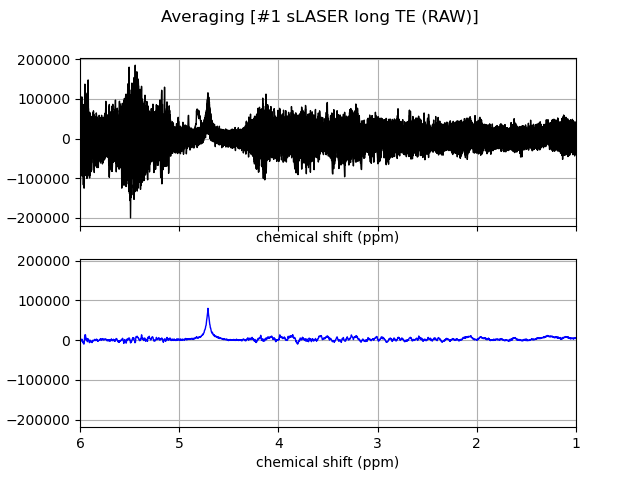

(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency shifting on [#1 sLASER long TE (RAW)]...


<IPython.core.display.Javascript object>


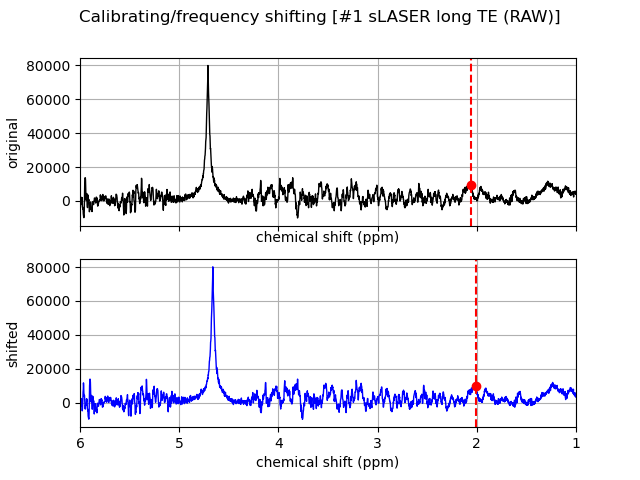

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: cropping on [#1 sLASER long TE (RAW)]...


<IPython.core.display.Javascript object>


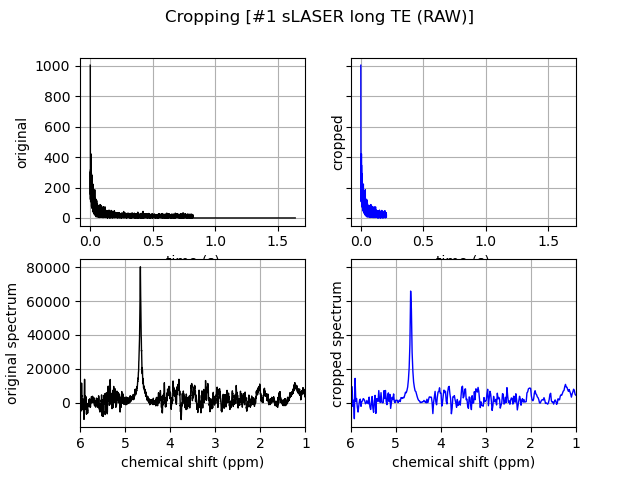

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#1 sLASER long TE (RAW)]...
(INFO) ----------------------------------------
(INFO)  pipeline.run: processing [#1 sLASER long TE (DCM)]
(INFO) ----------------------------------------
(WARNING) pipeline.run: changing phasing setting [using_ref_data] to 0 for this dataset!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: phasing on [#1 sLASER long TE (DCM)]...


phasing: ██████████████████████████████ done.


(WARNING) MRSData2.correct_phase_3d: you want to phase data based on ref. data but no such data is available!


phasing: ██████████████████████████████ done.


<IPython.core.display.Javascript object>


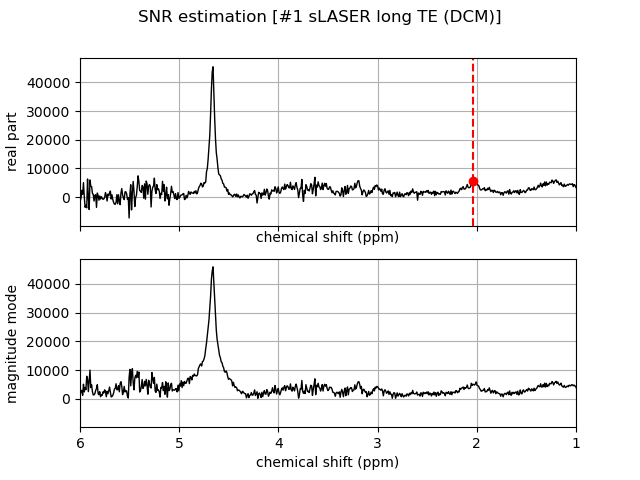

<IPython.core.display.Javascript object>


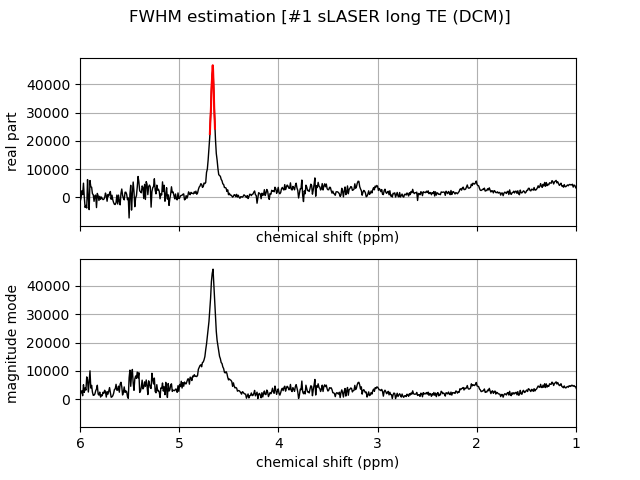

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: scaling intensity on [#1 sLASER long TE (DCM)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: channel-combining on [#1 sLASER long TE (DCM)]...
(WARNING) MRSData2.correct_combine_channels_3d: this is a single-channel signal, no need to recombine this!
(WARNING) MRSData2.correct_combine_channels_3d: reshaped to (1, 4096)
(WARNING) MRSData2.correct_combine_channels_3d: you want to channel-combine data based on ref. data but no such data is available!
(WARNING) MRSData2.correct_combine_channels_3d: this is a single-channel signal, no need to recombine this!
(WARNING) MRSData2.correct_combine_channels_3d: reshaped to (1, 4096)
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: estimating noise level on [#1 sLASER long TE (DCM)]...
(INFO)  MRSData2.analyze_noise_nd: noise level = 8.38E+00
(INFO)  MRSData2.analyze_noise_nd: noise level = 6.33E+01
(INFO) ----------

<IPython.core.display.Javascript object>


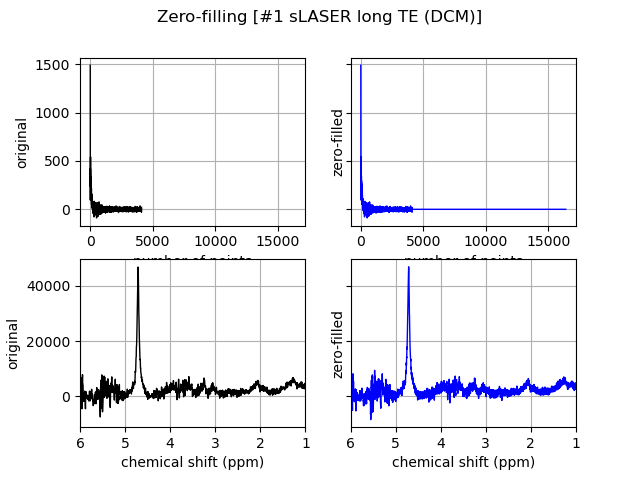

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency realigning on [#1 sLASER long TE (DCM)]...
(WARNING) MRSData2.correct_realign_2d: single-shot signal, cannot realign this!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: data rejecting on [#1 sLASER long TE (DCM)]...
(WARNING) MRSData2.correct_analyze_and_reject_2d: single-shot signal, nothing to analyze!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: averaging on [#1 sLASER long TE (DCM)]...
(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(WARNING) MRSData2.correct_average_2d: single-shot signal, nothing to average!
(WARNING) MRSData2.correct_average_2d: reshaped to a (16384,) vector
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: frequency shifting on [#1 sLASER long TE (DCM)]...


<IPython.core.display.Javascript object>


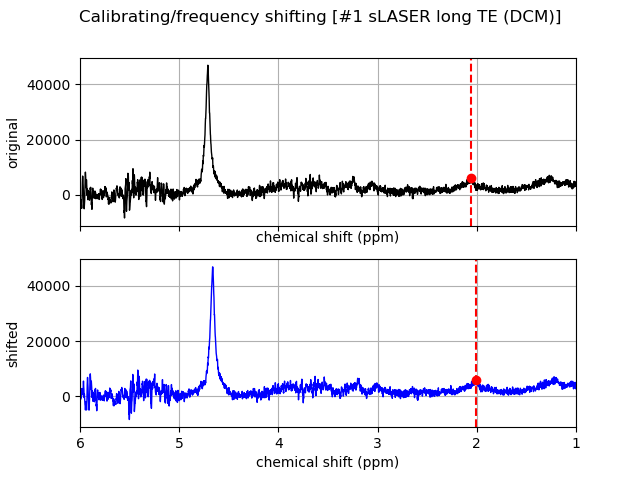

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: cropping on [#1 sLASER long TE (DCM)]...


<IPython.core.display.Javascript object>


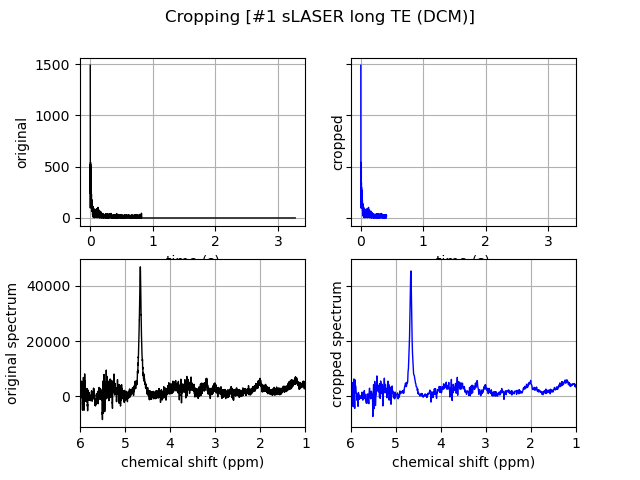

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#1 sLASER long TE (DCM)]...
(INFO)  pipeline.display_analyze_results: displaying SNR and linewidth final results...
(INFO) ----------------------------------------


RAW / DCM dataset 	SNR (u.a)           	LW (Hz)             	ref. data LW (Hz)   

#0 sLASER short TE	16.39 / 13.13       	12.21 / 14.65       	14.04 / 12.51       
#1 sLASER long TE 	11.50 / 7.28        	13.43 / 15.56       	13.43 / 10.99       


(INFO) ----------------------------------------


<IPython.core.display.Javascript object>


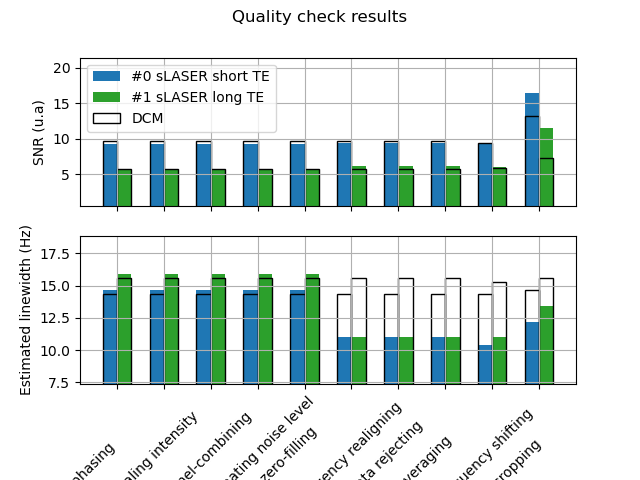

(INFO)  pipeline.run: pipeline terminated!
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#0 sLASER short TE (RAW)]...


<IPython.core.display.Javascript object>


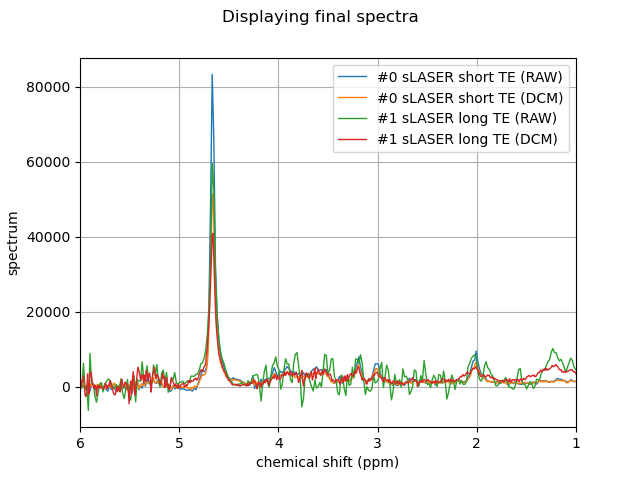

(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#0 sLASER short TE (DCM)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#1 sLASER long TE (RAW)]...
(INFO) ----------------------------------------
(INFO)  pipeline._run_job: displaying on [#1 sLASER long TE (DCM)]...


In [3]:
# create a reconstruction pipeline by recalling previously designed "spinalcord" pipeline
p = reco.pipeline("reco_pipeline_spinalcord")

# --- first dataset #0 ---

# legend
p.dataset[0]["legend"] = "sLASER short TE"

# some extra information (optional)
p.dataset[0]["resp_bpm"] = 17
p.dataset[0]["heart_bpm"] = 75

# dicom files, data reconstructed by the console
# two files: one acquired with water suppresion (WS, and one without (noWS)
p.dataset[0]["dcm"]["files"] = ["./data/spinal_cord_sLASER_longTE_WS.dcm",
                                "./data/spinal_cord_sLASER_longTE_noWS.dcm"]

# raw data files (TWIX files)
# two files: one acquired with water suppresion (WS, and one without (noWS)
p.dataset[0]["raw"]["files"] = ["./data/spinal_cord_sLASER_longTE_WS.dat",
                                "./data/spinal_cord_sLASER_longTE_noWS.dat"]

# --- second dataset #1 ---

# legend
p.dataset[1]["legend"] = "sLASER long TE"

# some extra information (optional)
p.dataset[1]["resp_bpm"] = 17
p.dataset[1]["heart_bpm"] = 65

# dicom files, data reconstructed by the console
# two files: one acquired with water suppresion (WS, and one without (noWS)
p.dataset[1]["dcm"]["files"] = ["./data/spinal_cord_sLASER_shortTE_WS.dcm",
                                "./data/spinal_cord_sLASER_shortTE_noWS.dcm"]

# raw data files (TWIX files)
# two files: one acquired with water suppresion (WS, and one without (noWS)
p.dataset[1]["raw"]["files"] = ["./data/spinal_cord_sLASER_shortTE_WS.dat",
                                "./data/spinal_cord_sLASER_shortTE_noWS.dat"]

# execute reconstruction pipeline (can take some time)
p.run()

# quality check, especially check that the raw data was reconstructed with a better/similar SNR and FWHM compared to the dicom data
p.check_analyze_results()

# the reconstructed data with its pipeline is saved on the disk
p.save_datasets()

# plot final results
p.display_final_data()